In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
"""Import basic modules"""
import math
import os
import gc
import random
import pprint
import numpy as np               # For linear algebra
import pandas as pd              # For data manipulation
import matplotlib.pyplot as plt  # For 2D visualization
import seaborn as sns

# Warning Libraries 
import warnings
warnings.filterwarnings("ignore")
# warnings.simplefilter(action='ignore', category=FutureWarning)

from collections import Counter
from scipy import stats                         # For statistics
from scipy.stats.contingency import association # upgrade scipy to use this to calculate Cramer's V

"""Plotly visualization"""
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
  

"""scikit-learn modules"""
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import PowerTransformer # convert to Gaussian-like data
from sklearn.feature_selection import chi2
from sklearn.metrics import matthews_corrcoef

import multiprocessing
import pickle, joblib


from IPython.display import Markdown, display

# utility function to print markdown string
def printmd(string):
    display(Markdown(string))


sns.set_style('whitegrid')

init_notebook_mode(connected=True) # to display plotly graph offline

%matplotlib inline

In [3]:
# customize as needed
plt_params = {
    # 'figure.facecolor': 'white',
    'axes.facecolor' : 'white',

    ## to set size 
    # 'legend.fontsize': 'x-large',
    # 'figure.figsize': (15, 10),
    # 'axes.labelsize': 'x-large',
    # 'axes.titlesize': 'x-large',
    # 'xtick.labelsize': 'x-large',
    # 'ytick.labelsize': 'x-large'
}

plt.rcParams.update(plt_params)

In [4]:
# padding value to print left padded string
left_padding = 21

# seed value
SEED = 42

def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(SEED)

In [5]:
# df_churn=pd.read_excel('/kaggle/input/capstone-preprocessing/after_preprocessing.xlsx')

df_churn=pd.read_excel('/kaggle/input/capstone-preprocessing/after_preprocessing_and_label_encoder.xlsx')

# Binning

In [6]:
def binning_feature(feature):
    plt.hist(df_churn[feature])

    # set x/y labels and plot title
    plt.xlabel(f"{feature.title()}")
    plt.ylabel("Count")
    plt.title(f"{feature.title()} Bins")
    plt.show()

    bins = np.linspace(min(df_churn[feature]), max(df_churn[feature]), 4)
    
    printmd("**Value Range**")
    
    printmd(f"Low ({bins[0] : .2f} - {bins[1]: .2f})")
    printmd(f"Medium ({bins[1]: .2f} - {bins[2]: .2f})")
    printmd(f"High ({bins[2]: .2f} - {bins[3]: .2f})")

    group_names = ['Low', 'Medium', 'High']

    df_churn.insert(df_churn.shape[1]-1,f'{feature}-binned', pd.cut(df_churn[feature], bins, labels=group_names, include_lowest=True))
    display(df_churn[[feature, f'{feature}-binned']].head(10))


    # count values
    printmd("<br>**Binning Distribution**<br>")
    display(df_churn[f'{feature}-binned'].value_counts())


    # plot the distribution of each bin
    plt.bar(group_names, df_churn[f'{feature}-binned'].value_counts())
    # px.bar(data_canada, x='year', y='pop')

    # set x/y labels and plot title
    plt.xlabel(f"{feature.title()}")
    plt.ylabel("Count")
    plt.title(f"{feature.title()} Bins")
    plt.show()

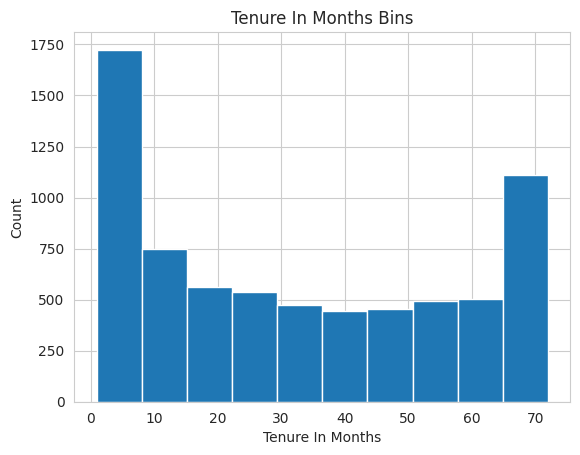

**Value Range**

Low ( 1.00 -  24.67)

Medium ( 24.67 -  48.33)

High ( 48.33 -  72.00)

,Tenure in Months,Tenure in Months-binned
0,69,High
1,8,Low
2,17,Low
3,1,Low
4,13,Low
5,38,Medium
6,34,Medium
7,58,High
8,59,High
9,1,Low


<br>**Binning Distribution**<br>

Tenure in Months-binned
Low       3210
High      2239
Medium    1594
Name: count, dtype: int64

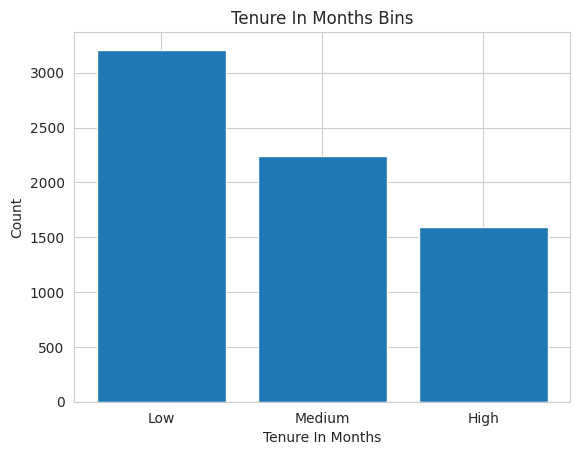

In [7]:
binning_feature('Tenure in Months')

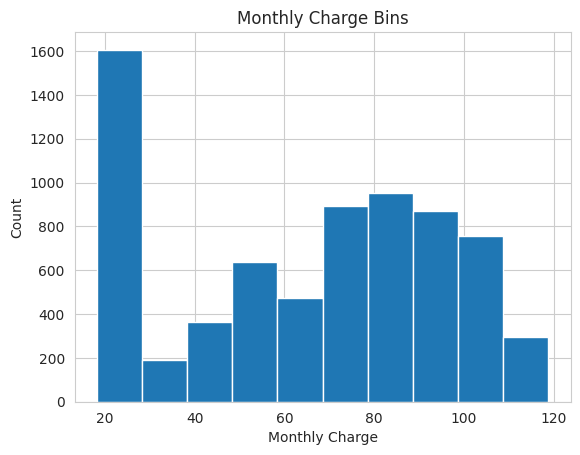

**Value Range**

Low ( 18.25 -  51.75)

Medium ( 51.75 -  85.25)

High ( 85.25 -  118.75)

,Monthly Charge,Monthly Charge-binned
0,109.95,High
1,94.45,High
2,34.40,Low
3,29.85,Low
4,20.40,Low
5,94.75,High
6,56.95,Medium
7,20.75,Low
8,94.75,High
9,18.80,Low


<br>**Binning Distribution**<br>

Monthly Charge-binned
Low       2451
Medium    2439
High      2153
Name: count, dtype: int64

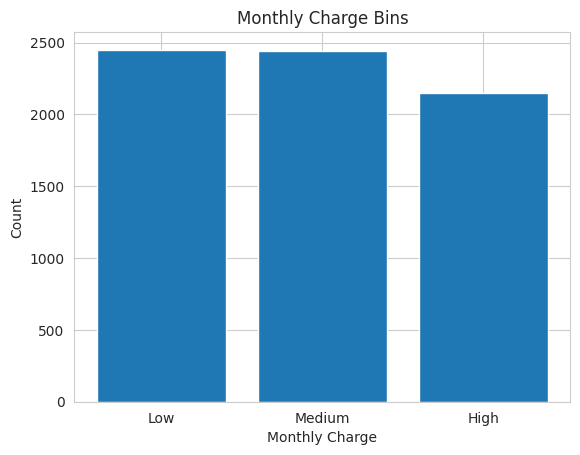

In [8]:
binning_feature('Monthly Charge')

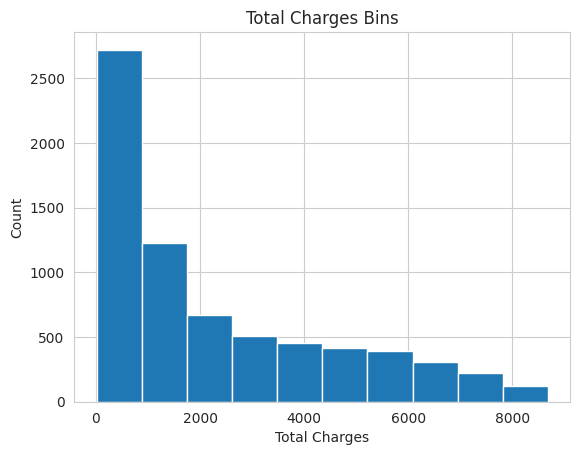

**Value Range**

Low ( 18.80 -  2907.47)

Medium ( 2907.47 -  5796.13)

High ( 5796.13 -  8684.80)

,Total Charges,Total Charges-binned
0,7634.25,High
1,742.95,Low
2,592.75,Low
3,29.85,Low
4,251.65,Low
5,3653.00,Medium
6,1889.50,Low
7,1185.95,Low
8,5597.65,Medium
9,18.80,Low


<br>**Binning Distribution**<br>

Total Charges-binned
Low       4789
Medium    1471
High       783
Name: count, dtype: int64

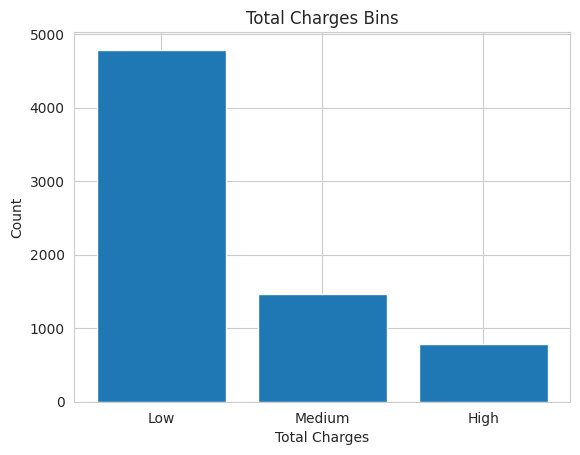

In [9]:
binning_feature('Total Charges')

# Visualization

In [10]:
df_churn.columns

Index(['Unnamed: 0', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Tenure in Months-binned',
       'Monthly Charge-binned', 'Total Charges-binned', 'Churn Value'],
      dtype='object')

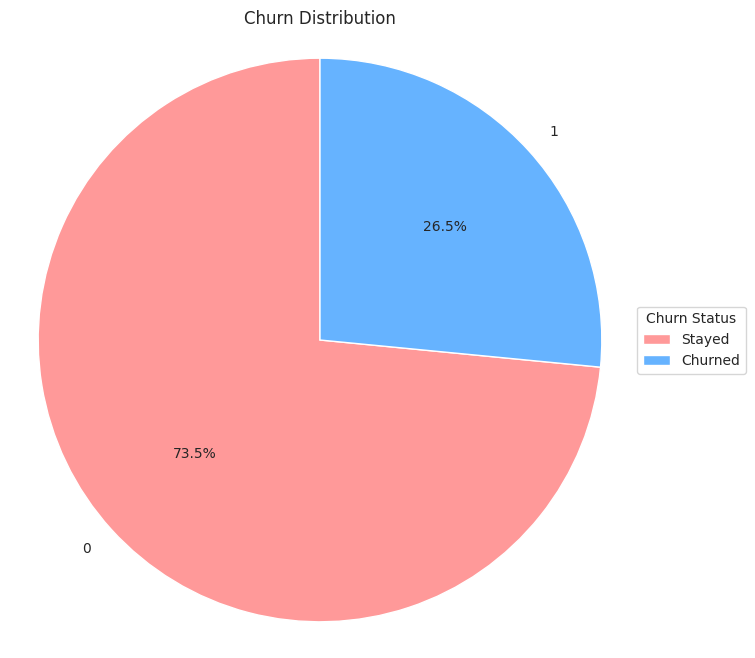

In [11]:
churn_counts = df_churn['Churn Value'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Churn Distribution')
plt.legend(title="Churn Status", labels=["Stayed", "Churned"], loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

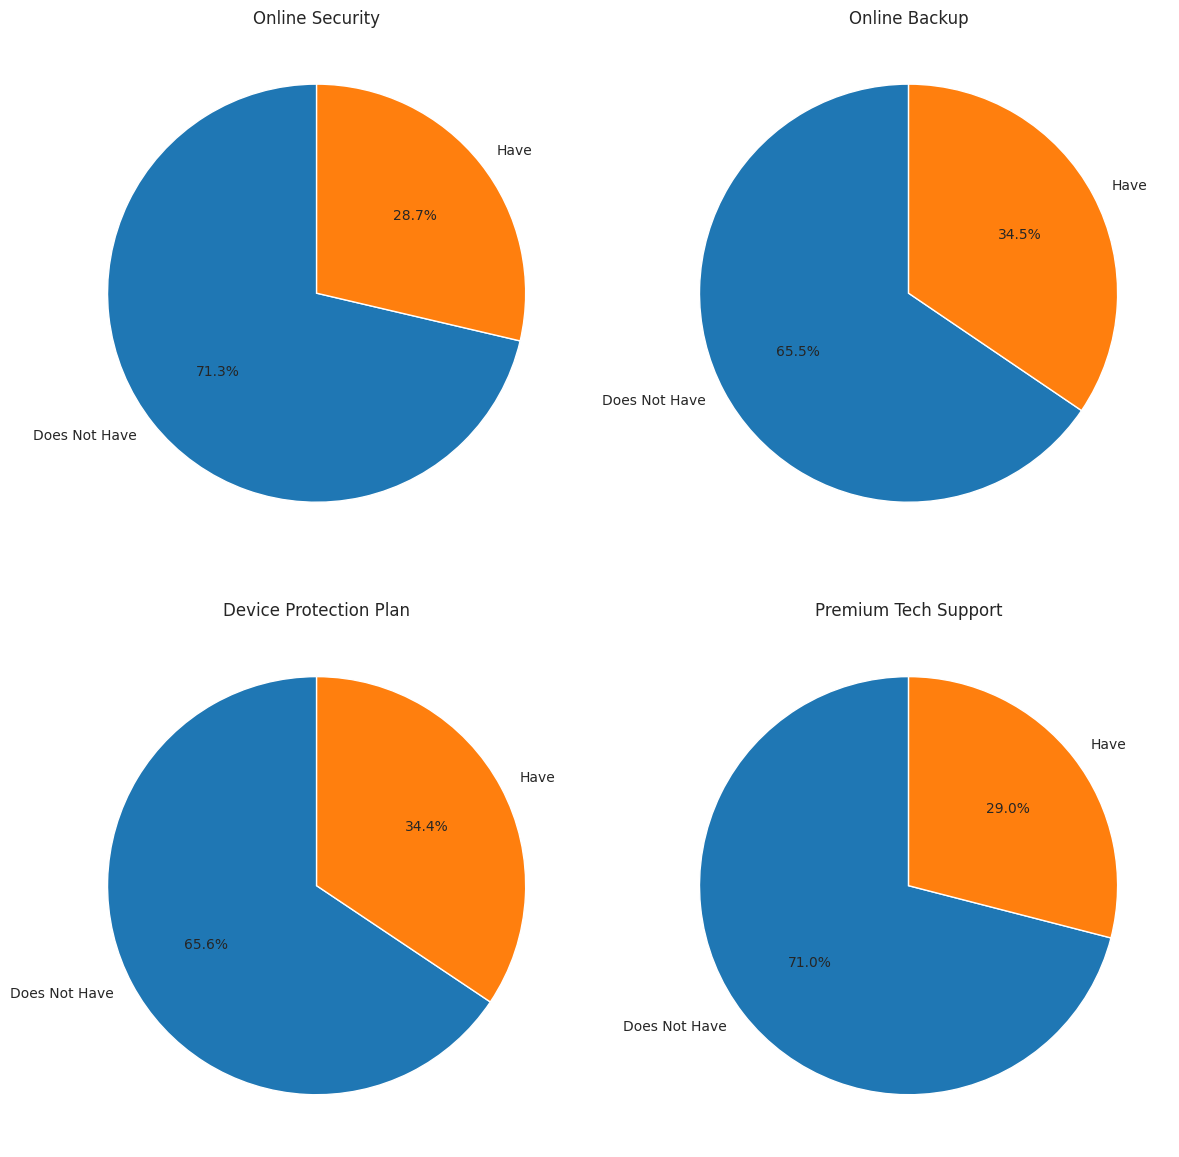

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))


for i, col in enumerate(['Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support']):
    # Calculate the counts of 0s and 1s
    counts = df_churn[col].value_counts()
    
    # Create a pie chart
    ax = axs[i // 2, i % 2]
    ax.pie(counts, labels=['Does Not Have', 'Have'], autopct='%1.1f%%', startangle=90)
    ax.set_title(col)

plt.tight_layout()
plt.show()

295
1724
1574
3450


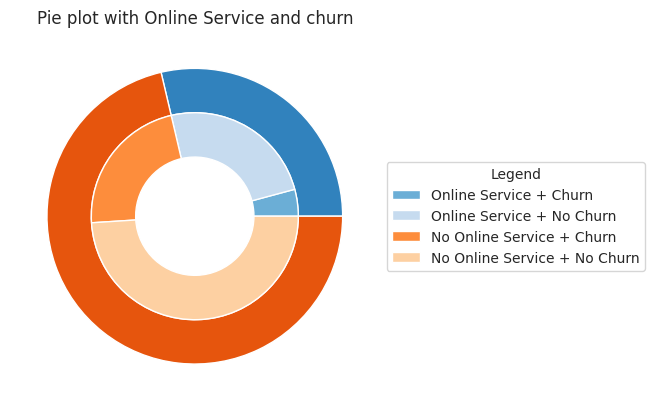

In [13]:
online_service_y_churn_y=len(df_churn[(df_churn['Online Security'] == 1) & (df_churn['Churn Value'] == 1)])
online_service_y_churn_n=len(df_churn[(df_churn['Online Security'] == 1) & (df_churn['Churn Value'] == 0)])
online_service_n_churn_y=len(df_churn[(df_churn['Online Security'] == 0) & (df_churn['Churn Value'] == 1)])
online_service_n_churn_n=len(df_churn[(df_churn['Online Security'] == 0) & (df_churn['Churn Value'] == 0)])


print(online_service_y_churn_y)
print(online_service_y_churn_n)
print(online_service_n_churn_y)
print(online_service_n_churn_n)

fig, ax = plt.subplots()

size = 0.3

vals = np.array([[online_service_y_churn_y, online_service_y_churn_n], [online_service_n_churn_y, online_service_n_churn_n]])

cmap = plt.cm.get_cmap("tab20c")
outer_colors = cmap(np.arange(2)*4)
inner_colors = cmap([1, 3, 5, 7])

# Plot outer pie chart
outer = ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

# Plot inner pie chart
inner = ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

# Create custom legend labels
legend_labels = ['Online Service + Churn', 'Online Service + No Churn', 'No Online Service + Churn', 'No Online Service + No Churn']

# Add legend to the chart
ax.legend(inner[0], legend_labels, title="Legend", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.set(aspect="equal", title='Pie plot with Online Service and churn')

plt.show()

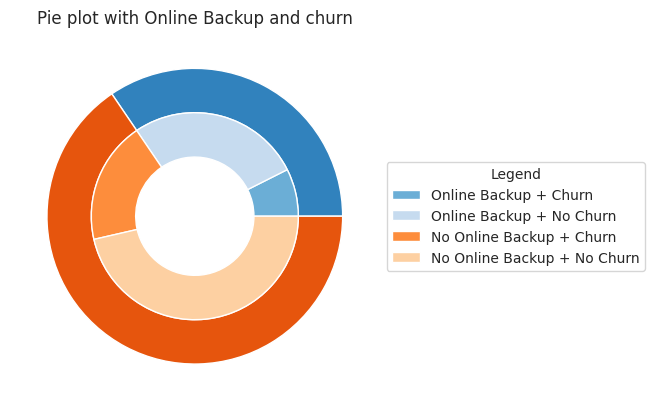

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the values for Online Backup
online_backup_y_churn_y = len(df_churn[(df_churn['Online Backup'] == 1) & (df_churn['Churn Value'] == 1)])
online_backup_y_churn_n = len(df_churn[(df_churn['Online Backup'] == 1) & (df_churn['Churn Value'] == 0)])
online_backup_n_churn_y = len(df_churn[(df_churn['Online Backup'] == 0) & (df_churn['Churn Value'] == 1)])
online_backup_n_churn_n = len(df_churn[(df_churn['Online Backup'] == 0) & (df_churn['Churn Value'] == 0)])

# Create a figure and axis
fig, ax = plt.subplots()

# Define size for the inner pie chart
size = 0.3

# Create a 2x2 array of values for the outer and inner pie charts
vals = np.array([[online_backup_y_churn_y, online_backup_y_churn_n], [online_backup_n_churn_y, online_backup_n_churn_n]])

# Define colors for the pie charts
cmap = plt.cm.get_cmap("tab20c")
outer_colors = cmap(np.arange(2)*4)
inner_colors = cmap([1, 3, 5, 7])

# Plot outer pie chart
outer = ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

# Plot inner pie chart
inner = ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

# Create custom legend labels
legend_labels = ['Online Backup + Churn', 'Online Backup + No Churn', 'No Online Backup + Churn', 'No Online Backup + No Churn']

# Add legend to the chart
ax.legend(inner[0], legend_labels, title="Legend", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.set(aspect="equal", title='Pie plot with Online Backup and churn')

plt.show()


545
1877
1324
3297


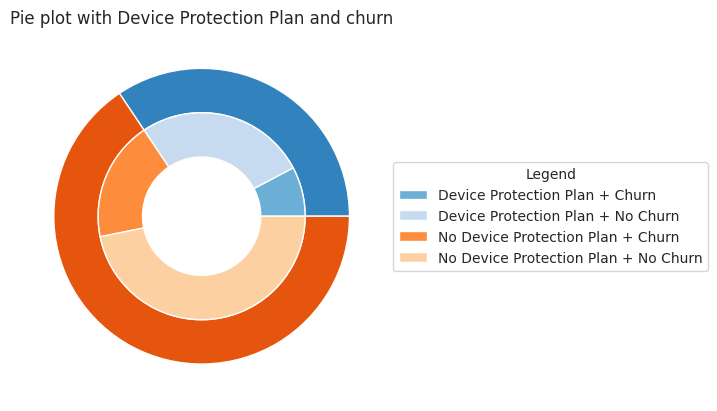

In [15]:
device_y_churn_y = len(df_churn[(df_churn['Device Protection Plan'] == 1) & (df_churn['Churn Value'] == 1)])
device_y_churn_n = len(df_churn[(df_churn['Device Protection Plan'] == 1) & (df_churn['Churn Value'] == 0)])
device_n_churn_y = len(df_churn[(df_churn['Device Protection Plan'] == 0) & (df_churn['Churn Value'] == 1)])
device_n_churn_n = len(df_churn[(df_churn['Device Protection Plan'] == 0) & (df_churn['Churn Value'] == 0)])

print(device_y_churn_y)
print(device_y_churn_n)
print(device_n_churn_y)
print(device_n_churn_n)

fig, ax = plt.subplots()

size = 0.3

vals = np.array([[device_y_churn_y, device_y_churn_n], [device_n_churn_y, device_n_churn_n]])

cmap = plt.cm.get_cmap("tab20c")
outer_colors = cmap(np.arange(2) * 4)
inner_colors = cmap([1, 3, 5, 7])

# Plot outer pie chart
outer = ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
                wedgeprops=dict(width=size, edgecolor='w'))

# Plot inner pie chart
inner = ax.pie(vals.flatten(), radius=1 - size, colors=inner_colors,
                wedgeprops=dict(width=size, edgecolor='w'))

# Create custom legend labels
legend_labels = ['Device Protection Plan + Churn', 'Device Protection Plan + No Churn',
                 'No Device Protection Plan + Churn', 'No Device Protection Plan + No Churn']

# Add legend to the chart
ax.legend(inner[0], legend_labels, title="Legend", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.set(aspect="equal", title='Pie plot with Device Protection Plan and churn')

plt.show()


310
1734
1559
3440


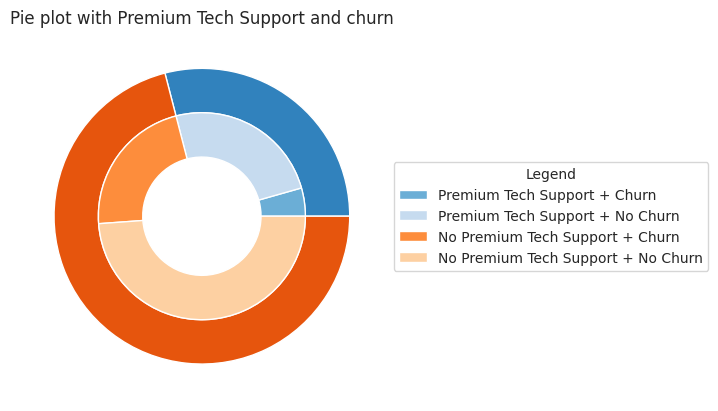

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the values for Premium Tech Support
premium_tech_y_churn_y = len(df_churn[(df_churn['Premium Tech Support'] == 1) & (df_churn['Churn Value'] == 1)])
premium_tech_y_churn_n = len(df_churn[(df_churn['Premium Tech Support'] == 1) & (df_churn['Churn Value'] == 0)])
premium_tech_n_churn_y = len(df_churn[(df_churn['Premium Tech Support'] == 0) & (df_churn['Churn Value'] == 1)])
premium_tech_n_churn_n = len(df_churn[(df_churn['Premium Tech Support'] == 0) & (df_churn['Churn Value'] == 0)])

# Print the counts
print(premium_tech_y_churn_y)
print(premium_tech_y_churn_n)
print(premium_tech_n_churn_y)
print(premium_tech_n_churn_n)

# Create the pie chart
fig, ax = plt.subplots()

size = 0.3
vals = np.array([[premium_tech_y_churn_y, premium_tech_y_churn_n], [premium_tech_n_churn_y, premium_tech_n_churn_n]])

cmap = plt.cm.get_cmap("tab20c")
outer_colors = cmap(np.arange(2)*4)
inner_colors = cmap([1, 3, 5, 7])

# Plot outer pie chart
outer = ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

# Plot inner pie chart
inner = ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

# Create custom legend labels
legend_labels = ['Premium Tech Support + Churn', 'Premium Tech Support + No Churn', 'No Premium Tech Support + Churn', 'No Premium Tech Support + No Churn']

# Add legend to the chart
ax.legend(inner[0], legend_labels, title="Legend", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.set(aspect="equal", title='Pie plot with Premium Tech Support and churn')

plt.show()


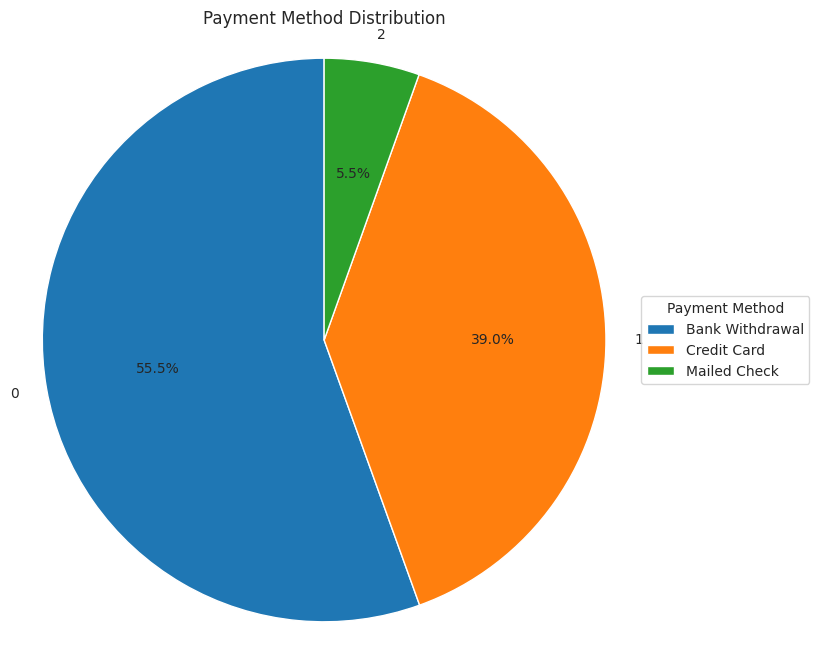

In [17]:
payment_method = df_churn['Payment Method'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(payment_method, labels=payment_method.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Payment Method Distribution')
plt.legend(title="Payment Method", labels=["Bank Withdrawal", "Credit Card","Mailed Check"], loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [18]:
# plt.figure(figsize=(8, 8))

# sns.countplot(x="Gender",data=df_churn)
# # plt.axis('equal')
# plt.title('Gender Distribution')
# plt.legend(title="Gender", labels=["Female", "Male"], loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
# plt.show()

In [19]:
df_churn.drop('Unnamed: 0',axis=1,inplace=True)

In [20]:
df_churn_wo_le=pd.read_excel('/kaggle/input/capstone-preprocessing/after_preprocessing.xlsx')

In [21]:
df_churn_wo_le.drop('Unnamed: 0',axis=1,inplace=True)

In [22]:
df_churn_wo_le['Churn']=df_churn_wo_le['Churn Value']

In [23]:
df_churn_wo_le['Churn'] = df_churn_wo_le['Churn'].replace({1: 'Yes', 0: 'No'})

In [24]:
df_churn_wo_le['Churn']

0        No
1       Yes
2        No
3        No
4        No
       ... 
7038    Yes
7039     No
7040    Yes
7041    Yes
7042    Yes
Name: Churn, Length: 7043, dtype: object

In [25]:
categorical = df_churn_wo_le.select_dtypes(include="object").columns
numerical = df_churn_wo_le.select_dtypes(exclude="object").columns

# Countplot based on customer Demographics

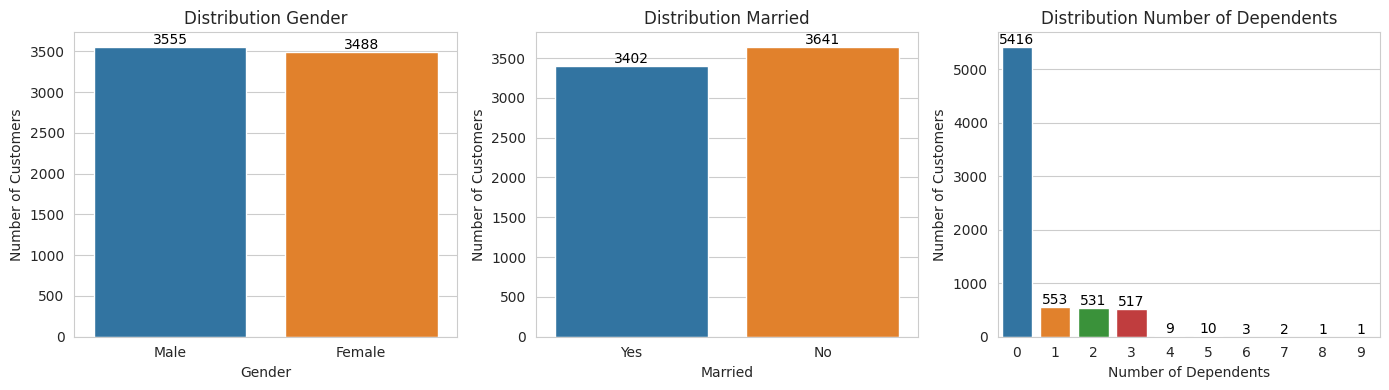

In [26]:

features = ["Gender","Married","Number of Dependents"]
plt.figure(figsize = (14,4))
for i in range(0,len(features)):
    plt.subplot(1, len(features), i+1)
    ax = sns.countplot(x=df_churn_wo_le[features[i]])
    ax.bar_label(ax.containers[0], color = "Black")
    plt.title("Distribution " + features[i])
    plt.ylabel("Number of Customers")
    plt.tight_layout()

# Countplot based on service type

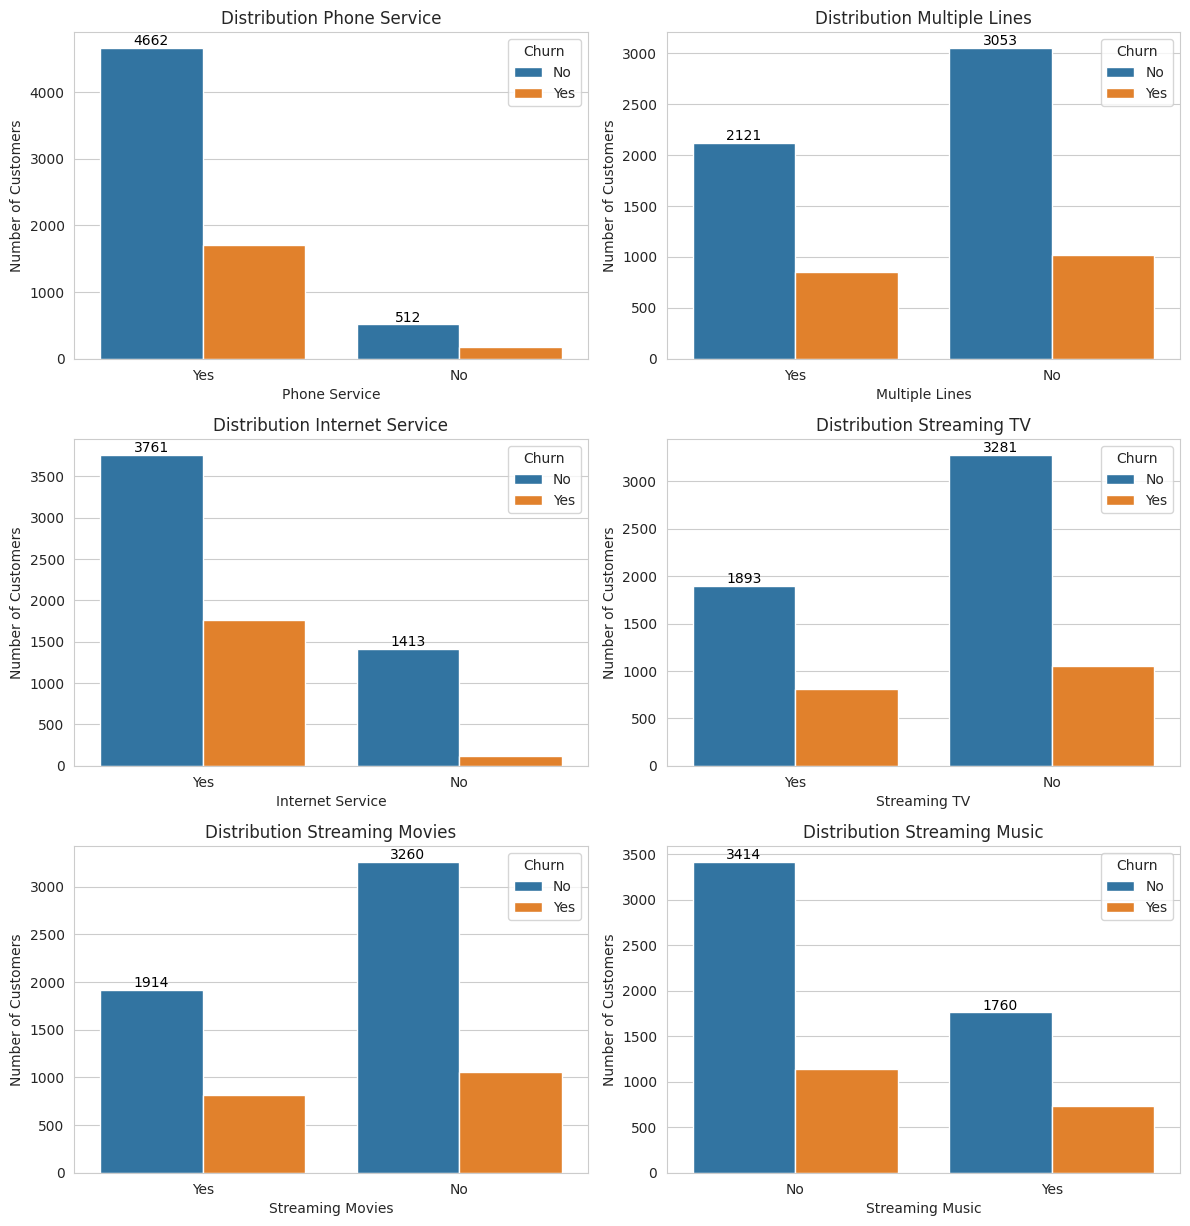

In [27]:
features = ["Phone Service","Multiple Lines","Internet Service", "Streaming TV","Streaming Movies","Streaming Music"]
churn_column=["Churn"]*len(features)
plt.figure(figsize = (12,16))
for i in range(0,len(features)):
    plt.subplot(4, len(features)//3, i+1)
    ax = sns.countplot(x=df_churn_wo_le[features[i]],hue=df_churn_wo_le[churn_column[i]])
    ax.bar_label(ax.containers[0], color = "Black")
    plt.title("Distribution " + features[i])
    plt.ylabel("Number of Customers")
    plt.tight_layout()

# Countplot based on payment type

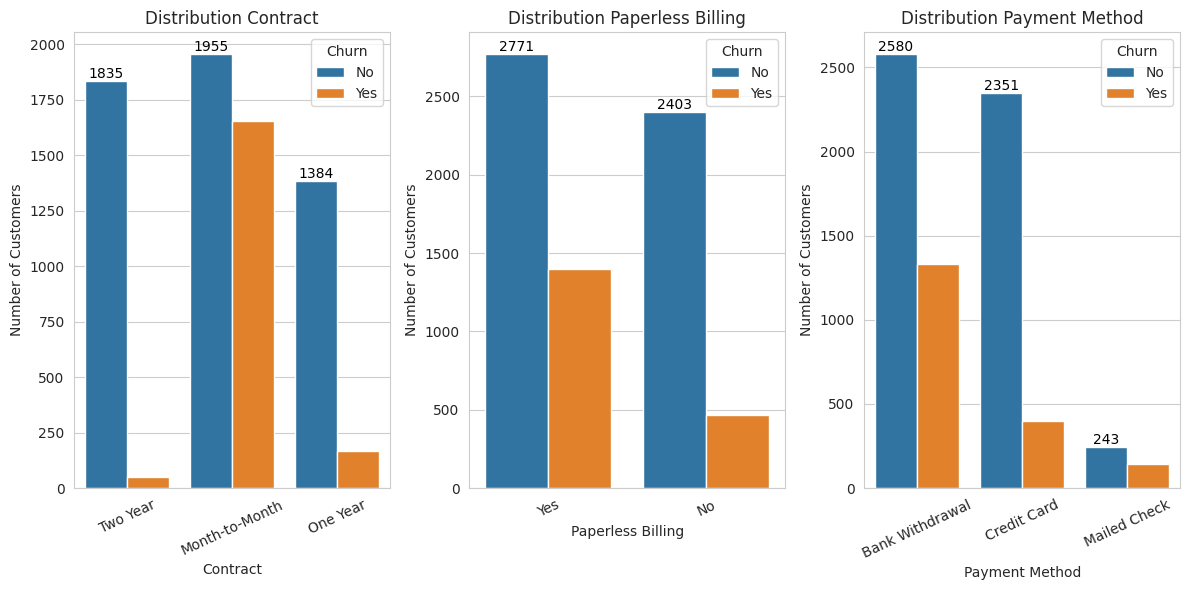

In [28]:
features = ["Contract","Paperless Billing","Payment Method"]
churn_column=["Churn"]*len(features)
plt.figure(figsize = (12,6))
for i in range(0,len(features)):
    plt.subplot(1, len(features), i+1)
    ax = sns.countplot(x=df_churn_wo_le[features[i]],hue=df_churn_wo_le[churn_column[i]])
    ax.bar_label(ax.containers[0], color = "Black")
    plt.title("Distribution " + features[i])
    plt.ylabel("Number of Customers")
    plt.xticks(rotation = 25)
    plt.tight_layout()

# Histogram and KDE Plot to determine the distribution of numerical data

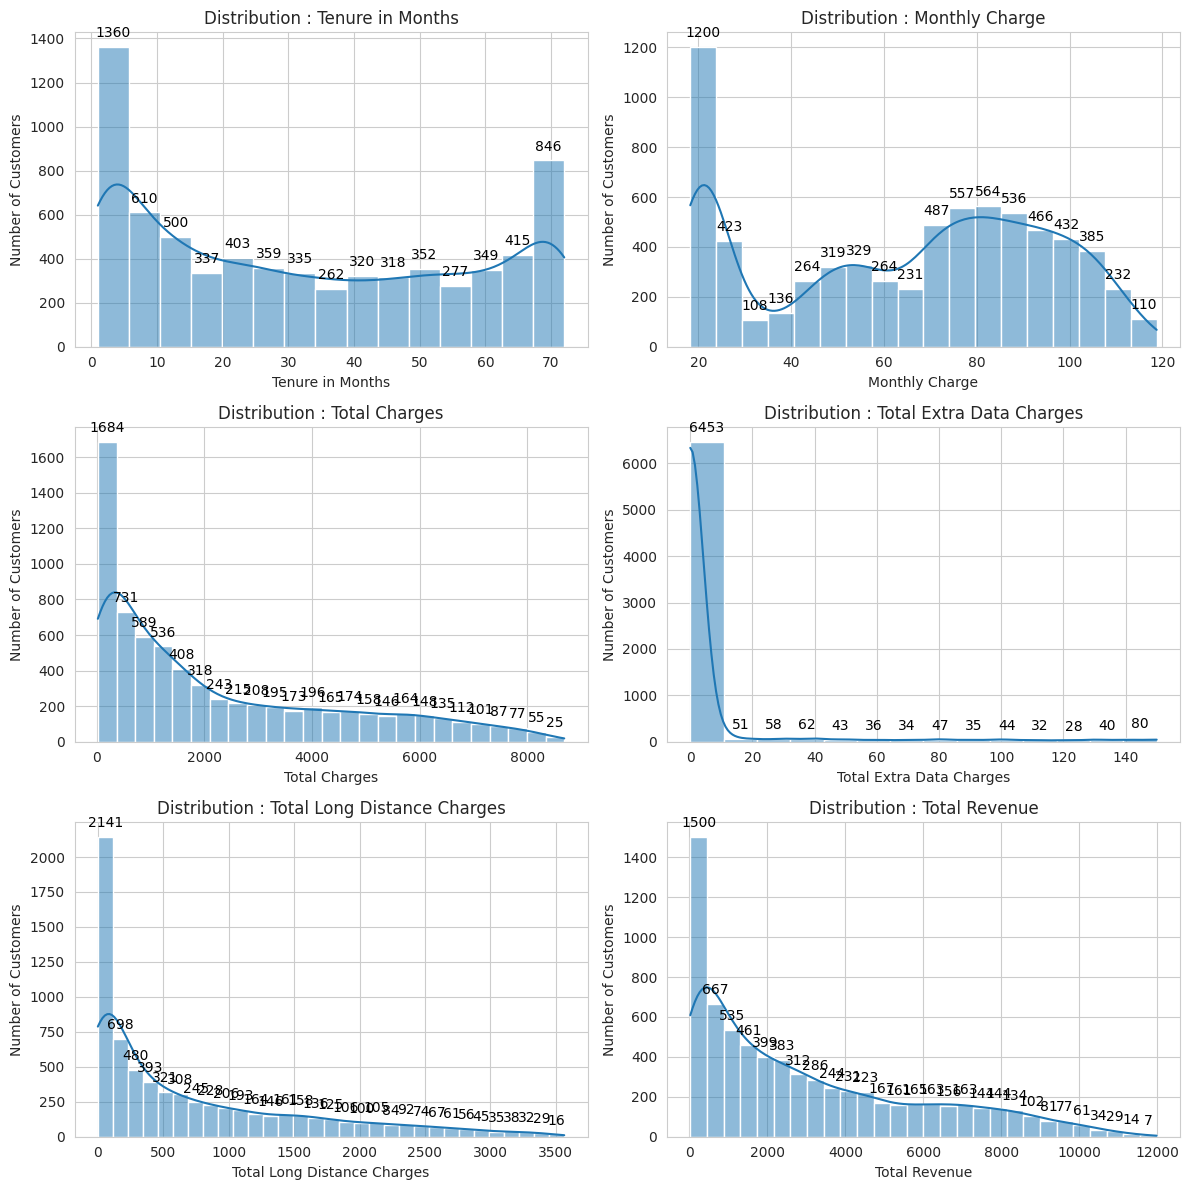

In [29]:
features = ['Tenure in Months','Monthly Charge','Total Charges','Total Extra Data Charges','Total Long Distance Charges','Total Revenue']

plt.figure(figsize = (12,12))
for i in range(0,len(features)):
    plt.subplot(3, len(features)//3, i+1)
    sns.histplot(x=df_churn_wo_le[features[i]],kde=True)
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', color='black')
    plt.title("Distribution : " + features[i])
    plt.ylabel("Number of Customers")
    plt.tight_layout()